# Week10 - Lab

* Use PCA to reduce dimentionality and use a linearRegressionModelear regression to predict
* Use t-SNE to visualize

In [2]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer() # Load the breast cancer dataset
features = breast_cancer_data['data'] # Extract the features (input variables)
labels = breast_cancer_data['target'] # Extract the labels (target variable)
class_names = breast_cancer_data.target_names # Extract the class names for the target variable

print(class_names) # Print the names of the target classes in the breast cancer dataset

['malignant' 'benign']


In [3]:
print(breast_cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
num_train_examples = X_train.shape[0]
num_test_examples = X_test.shape[0]

print("Number of training examples:", num_train_examples)
print("Number of test examples:", num_test_examples)

Number of training examples: 455
Number of test examples: 114


In [5]:
from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Apply PCA to reduce the dimensionality of X
X_pca = pca.fit_transform(X)

# Print the transformed data
print("Shape of transformed data:", X_pca.shape)

# The components attribute of PCA contains the principal components
principal_components = pca.components_
print("Principal components:", principal_components)

# The explained_variance_ratio_ attribute contains the variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)


Shape of transformed data: (569, 2)
Principal components: [[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04

In [10]:
from sklearn.linear_model import LinearRegression
# Create a linear regression model
linearRegressionModel = LinearRegression()

linearRegressionModel.fit(X_train, y_train)


LinearRegression()

In [9]:
from sklearn.metrics import r2_score

# Evaluate the performance of the model on the testing data
y_pred = linearRegressionModel.predict(X_test)
score = r2_score(y_test, y_pred)
print('R^2 Score:', score)

R^2 Score: 0.7413074204036687


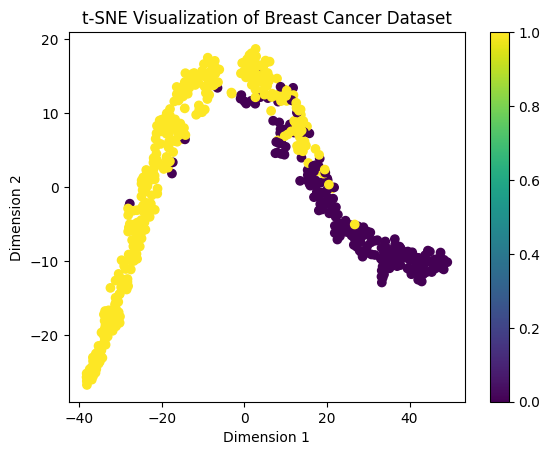

In [12]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Breast Cancer Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
